In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import glob
import seaborn as sns
import math
from matplotlib.pyplot import figure

In [3]:
os.chdir('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/ecology/core_virome')

In [4]:
species_df_list = []
species = ['sheep', 'cattle', 'goat', 'wild']
res = [f + '_df_category.tsv' for f in species]
for f in res:
    name=f.split('_')[0]
    df = pd.read_csv(f, sep='\t')
    df['treatment'] = name
    df.set_index('category', inplace=True)
    df = df.loc[['individualized', 'rare', 'common', 'core']].reset_index()
    species_df_list.append(df)
    

In [5]:
species_df = pd.concat(species_df_list).reset_index(drop = True)

In [6]:
grazing_df_list = []
grazing = ['non', 'grazing']
res = [f + '_df_category.tsv' for f in grazing]
for f in res:
    name=f.split('_')[0]
    df = pd.read_csv(f, sep='\t')
    df['treatment'] = name
    df.set_index('category', inplace=True)
    df = df.loc[['individualized', 'rare', 'common', 'core']].reset_index()
    grazing_df_list.append(df)
    
grazing_df = pd.concat(grazing_df_list).reset_index(drop = True)



In [7]:
grazing_df.loc[grazing_df.query('treatment == "non"').index, 'treatment'] = 'non-grazing'

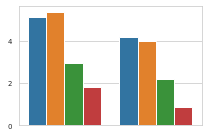

In [13]:
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (2,2)
sns.barplot(x = grazing_df["treatment"], y = [math.log(f,10) for f in grazing_df["count"]], hue = "category", data= species_df)
plt.legend([],[], frameon=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize = 7)
plt.xticks([])
#plt.yticks([])

plt.tight_layout()

plt.savefig('grazing_virome_category.svg', transparent=True)

In [9]:
cattle_df_list = []
cattle = ['dairy', 'beef']
res = [f + '_df_category.tsv' for f in cattle]
for f in res:
    name=f.split('_')[0]
    df = pd.read_csv(f, sep='\t')
    df['treatment'] = name
    df.set_index('category', inplace=True)
    df = df.loc[['individualized', 'rare', 'common', 'core']].reset_index()
    cattle_df_list.append(df)
    
cattle_df = pd.concat(cattle_df_list).reset_index(drop = True)

In [10]:
cattle_df

,category,count,treatment
0,individualized,29627,dairy
1,rare,42148,dairy
2,common,1494,dairy
3,core,213,dairy
4,individualized,55670,beef
5,rare,100676,beef
6,common,1448,beef
7,core,164,beef


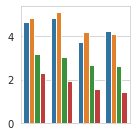

In [14]:
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (3,2)
sns.barplot(x = species_df["treatment"], y = [math.log(f,10) for f in species_df["count"]], hue = "category", data= species_df)
plt.legend([],[], frameon=False)
plt.xlabel('')
plt.ylabel('', fontsize=7)
plt.xticks([])
#plt.yticks([])
#plt.yticks(fontsize = 7)

plt.tight_layout()

plt.savefig('species_virome_category.svg', transparent=True)

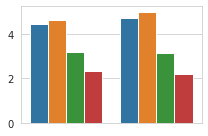

In [15]:
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (2,2)
sns.barplot(x = cattle_df["treatment"], y = [math.log(f,10) for f in cattle_df["count"]], hue = "category", data= cattle_df)
plt.legend([],[], frameon=False)
plt.xlabel('')
plt.ylabel('')
#plt.yticks(fontsize = 7)
plt.xticks([])
#plt.yticks([])

plt.tight_layout()

plt.savefig('cattle_virome_category.svg', transparent=True)